# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and prepare covid data

In [2]:
data_folder = '../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_month.csv')
covid_data.head()

,date,new_cases_ma,new_deaths_ma
0,2020-03-01,150.576923,12.333333
1,2020-04-01,2174.333333,154.366667
2,2020-05-01,12159.870968,709.129032
3,2020-06-01,27629.260870,1006.033333
4,2020-07-01,38946.774194,1044.064516


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-01,150.576923,12.333333
2020-04-01,2174.333333,154.366667
2020-05-01,12159.870968,709.129032
2020-06-01,27629.260870,1006.033333
2020-07-01,38946.774194,1044.064516


## Prepare trips data

In [5]:
without_outliers = False

In [6]:
data_folder = '../data/'

if without_outliers:
    source_folder_path =  data_folder + 'trips/analysis/remove_outliers/'
else:
    source_folder_path = data_folder + 'trips/analysis/'

destination_folder_path = data_folder + 'charts/covid/'

In [7]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')
trips.head()

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516


In [8]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [9]:
trips = dp.transform_to_datetime(trips, ['date'])

In [10]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [11]:
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
date,,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000
2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429
2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258
2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516
2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000
2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258
2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000
2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333


## Merge COVID and trip data

In [12]:
trips_and_covid = pd.merge(trips, covid_data, left_index=True, right_index=True)
trips_and_covid

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,
2020-03-01,8211.451613,1703.564246,14.496716,29.130817,1927.461259,2.935484,0.290323,0.000000,150.576923,12.333333
2020-04-01,5700.433333,1857.467596,15.041097,28.104305,1502.080800,2.966667,0.266667,0.100000,2174.333333,154.366667
2020-05-01,5352.193548,1817.646573,14.992516,28.616641,1590.760019,3.193548,0.322581,0.032258,12159.870968,709.129032
2020-06-01,4978.800000,1842.382151,15.002379,28.865224,1599.315817,2.833333,0.266667,0.033333,27629.260870,1006.033333
2020-07-01,5554.516129,1803.096096,14.831451,29.402450,1776.294742,3.000000,0.258065,0.032258,38946.774194,1044.064516
2020-08-01,5987.032258,1828.122869,14.795013,29.425661,1758.511471,3.064516,0.322581,0.000000,41451.129032,973.645161
2020-09-01,7043.900000,1866.475558,14.581225,29.319024,1735.474504,2.900000,0.266667,0.033333,31207.833333,748.766667
2020-10-01,6697.483871,2009.330596,14.666196,29.224291,1758.768671,3.096774,0.290323,0.032258,23612.064516,537.258065
2020-11-01,5350.866667,2333.952735,14.352335,30.178350,2022.716202,3.000000,0.300000,0.066667,25812.133333,445.700000


In [13]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-03-01 00:00:00')

In [14]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

## Correlation

In [15]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

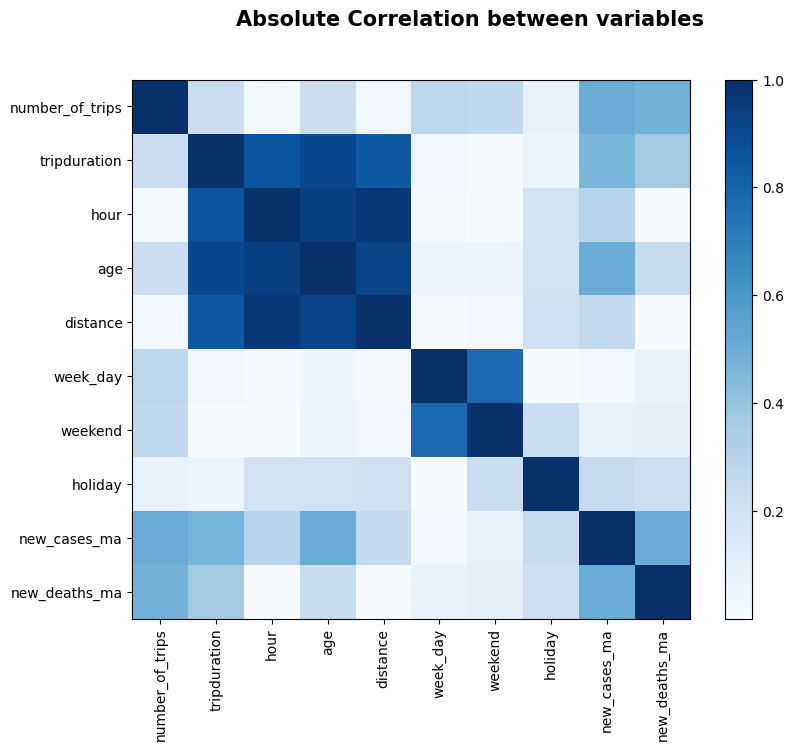

In [16]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

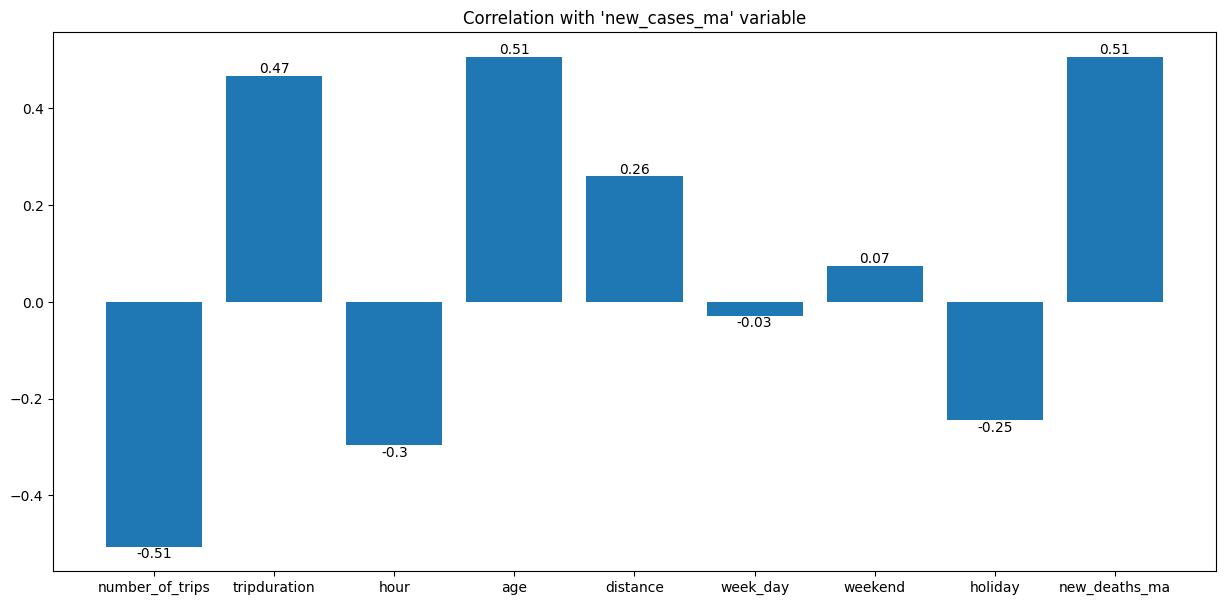

In [17]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

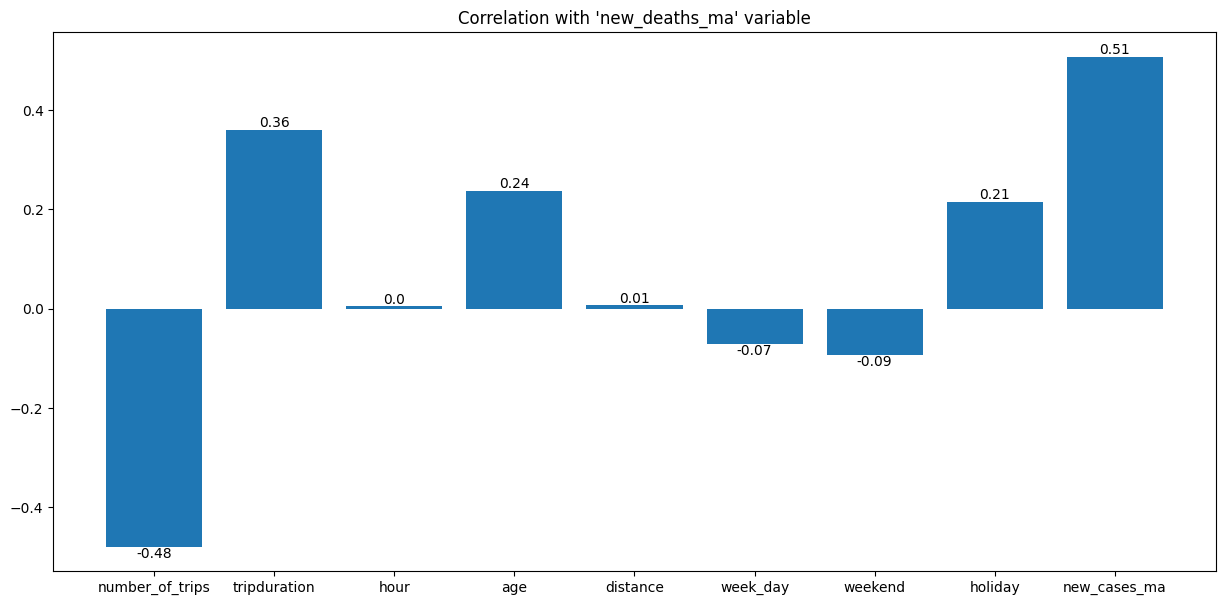

In [18]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

### Plot together

In [19]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None))
    plt.ylim(bottom=0)
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)

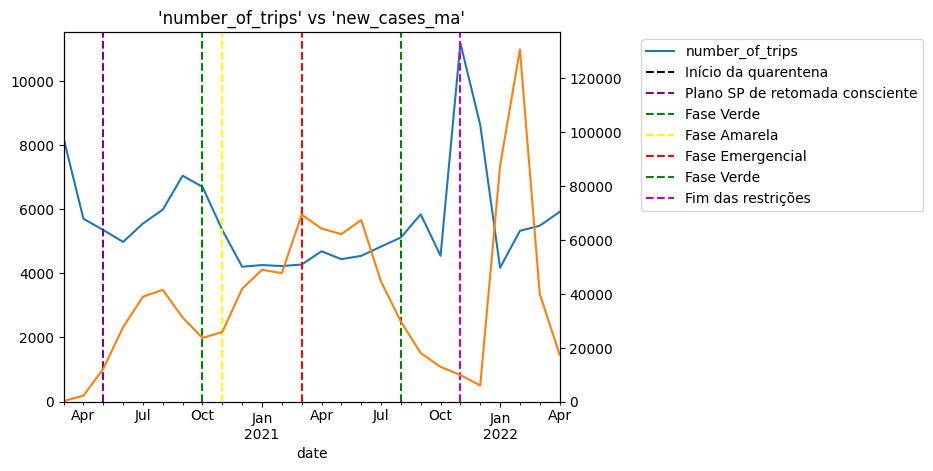

In [20]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

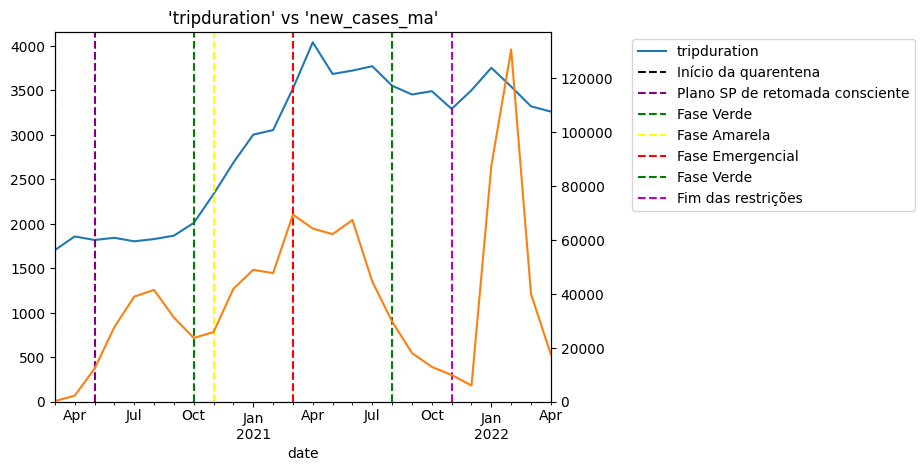

In [21]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

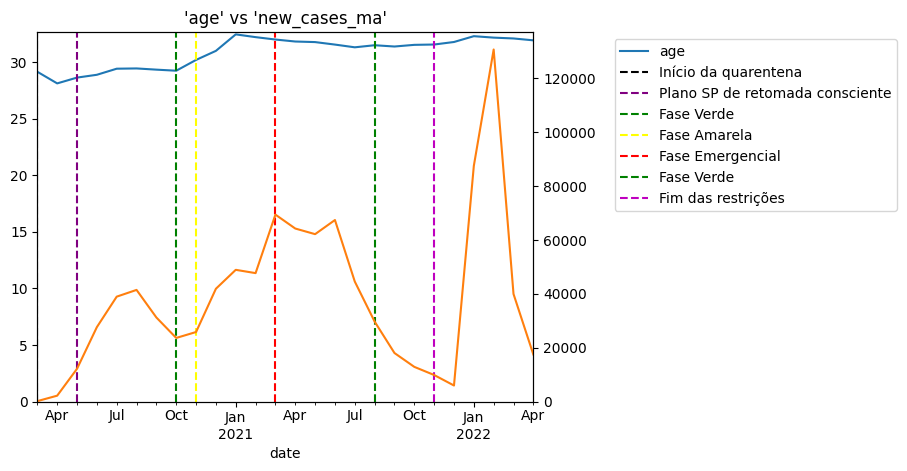

In [22]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)